## Import library

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import seaborn as sns
import numpy as np
from torch.utils.data import random_split
from torchvision import models
import torchvision as tv
import torch.optim as optim

In [ ]:
MODEL_NAME_1 = "cifar_model"
BATCH_SIZE=24 
num_epochs= 10 
weight_decay=1e-4
learning_rate = 0.001 
class_size=10
device = "cuda" if torch.cuda.is_available() else "cpu"

## Loading and preparing data

In [ ]:
transform = transforms.Compose([
                                transforms.Resize((224, 224)),
                                transforms.RandomHorizontalFlip(p=0.7),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                ])

train_dataset = tv.datasets.CIFAR10(root="./", 
                                    train=True,
                                    transform= transform,
                                    download=True)

test_dataset = tv.datasets.CIFAR10(root="./", 
                                   train=False,
                                   transform= transform,
                                   download=True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = BATCH_SIZE, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = BATCH_SIZE, 
                                          shuffle = False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


## Load model VGG-16

In [ ]:
vgg16= models.vgg16(pretrained= True)
vgg16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Train function

In [ ]:
def train(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/len(train_dataloader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')
    print()
    
    return train_loss, train_accuracy

## Test function

In [ ]:
def test(model, test_dataloader):
    model.eval()
    test_running_loss = 0.0

    total = len(test_loader.dataset)

    test_running_correct = 0
    for int, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        
        test_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        test_running_correct += (preds == target).sum().item()
    
    test_loss = test_running_loss/len(test_dataloader.dataset)
    test_accuracy = 100. * test_running_correct/len(test_dataloader.dataset)

    return test_loss, test_accuracy

In [ ]:
def test_correct(model):
  total = len(test_loader.dataset)
  val_running_correct = 0
  model = model.to(device)
  # model.load_state_dict(torch.load(MODEL_NAME))
  model.eval()
  for int, data in enumerate(test_loader):
    data, target = data[0].to(device), data[1].to(device)
    output = model(data)
    loss = criterion(output, target)
        
    _, preds = torch.max(output.data, 1)
    val_running_correct += (preds == target).sum().item()
    
    val_accuracy = 100. * val_running_correct/len(test_loader.dataset)

  print("correct", val_running_correct)
  print("total:", total)
  print("accuracy:", val_accuracy)

## Training

### First training

On the first training, keep the feature layers and classifier layers the same, learning rate = 0.001, optimizer = SGD and epochs = 10. 

In [ ]:
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = vgg16.to(device)

for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

Train Loss: 0.0560, Train Acc: 62.72

Train Loss: 0.0264, Train Acc: 77.97

Train Loss: 0.0233, Train Acc: 80.52

Train Loss: 0.0210, Train Acc: 82.52

Train Loss: 0.0197, Train Acc: 83.50

Train Loss: 0.0186, Train Acc: 84.41

Train Loss: 0.0176, Train Acc: 85.35

Train Loss: 0.0168, Train Acc: 85.88

Train Loss: 0.0161, Train Acc: 86.44

Train Loss: 0.0156, Train Acc: 86.81



In [ ]:
test_correct(vgg16)

correct 8687
total: 10000
accuracy: 86.87


<Figure size 1080x720 with 0 Axes>

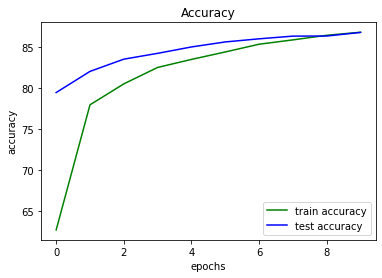

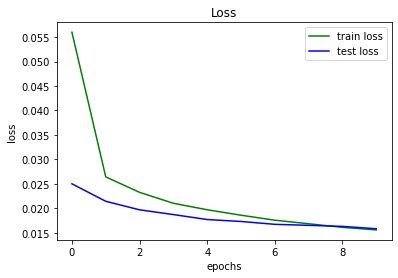

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Second training

Add 1 Dropout layer with p = 0.3, out_features = 10, learning rate = 0.001, optimizer = SGD, epochs = 10

In [ ]:
model_config_2 = torchvision.models.vgg16(pretrained=True)
model_config_2.to(device)
classes_list = list(model_config_2.classifier)
new_classes_list = []
new_classes_list.append(nn.Dropout(p=0.3, inplace=True))
for cls in classes_list:
    new_classes_list.append(cls)

model_config_2.classifier = nn.Sequential(*new_classes_list)
model_config_2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=25088, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
model_config_2.classifier[7].out_features = 10
model_config_2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=25088, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=4096, out_features=10, bias=True)
)

In [ ]:
optimizer = optim.SGD(model_config_2.classifier.parameters(), lr=0.001)

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = model_config_2.to(device)

for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

Train Loss: 0.0569, Train Acc: 62.26

Train Loss: 0.0272, Train Acc: 77.14

Train Loss: 0.0240, Train Acc: 79.86

Train Loss: 0.0220, Train Acc: 81.65

Train Loss: 0.0208, Train Acc: 82.76

Train Loss: 0.0196, Train Acc: 83.56

Train Loss: 0.0186, Train Acc: 84.12

Train Loss: 0.0180, Train Acc: 84.85

Train Loss: 0.0172, Train Acc: 85.50

Train Loss: 0.0165, Train Acc: 86.08



In [ ]:
test_correct(model_config_2)

correct 8680
total: 10000
accuracy: 86.8


<Figure size 720x504 with 0 Axes>

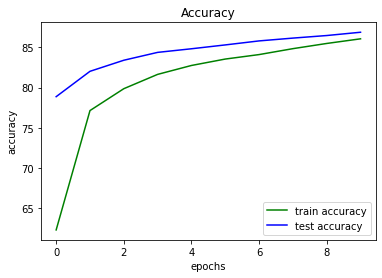

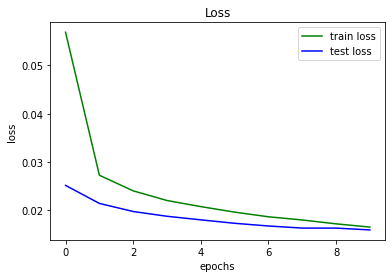

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Third training

Change the classifier layer of vgg16 (move the dropout layer at position [5] -> to position [0]), optimizer = SGD, learning rate = 0.001, weight_decay =5e-4, epochs=10

In [ ]:
model_config_3 = torchvision.models.vgg16(pretrained=True)
model_config_3.to(device)
classes_list = list(model_config_3.classifier)
new_classes_list = []
new_classes_list.append(nn.Dropout(p=0.5, inplace=True))
for cls in classes_list:
    if (cls != classes_list[5]):
      new_classes_list.append(cls)

model_config_3.classifier = nn.Sequential(*new_classes_list)
model_config_3.classifier[6].out_features = 10
model_config_3.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=True)
  (1): Linear(in_features=25088, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)

In [ ]:
optimizer = optim.SGD(model_config_3.classifier.parameters(), lr=0.001, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = model_config_3.to(device)

for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

Train Loss: 0.0533, Train Acc: 64.54

Train Loss: 0.0250, Train Acc: 78.81



In [ ]:
test_correct(model_config_3)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Fourth training

Keeping feature classes and classifiers unchanged, epochs = 10, optimizer = Adam, learning rate = 0.0005 and weight_decay=0.001, out_features = 10

In [ ]:
model_config_4 = torchvision.models.vgg16(pretrained=True)
print(model_config_4.to(device))
model_config_4.classifier[6].out_features = 10
print(model_config_4.classifier)

In [ ]:
optimizer = torch.optim.Adam(model_config_4.classifier.parameters(), lr=0.0005, weight_decay= 0.001) 

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = model_config_4.to(device)

for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

In [ ]:
test_correct(model_config_4)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Fifth training

Keep network layers intact + freeze feature layer + optimizer = Adam, learning rate = 0.0005, epochs=15, weight_decay=0.001, out_features = 10

In [ ]:
for param in vgg16.features.parameters():
    param.requires_grad = False

In [ ]:
model_config_5 = torchvision.models.vgg16(pretrained=True)
print(model_config_5.to(device))

model_config_5.classifier[6].out_features = 10
print(model_config_5.classifier)

In [ ]:
optimizer = torch.optim.Adam(model_config_5.classifier.parameters(), lr=0.0005, weight_decay= 0.001) 

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = model_config_5.to(device)

for epoch in range(15):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

In [ ]:
test_correct(model_config_5)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Last training

Add 1 dropout layer p = 0.3, optimizer = Adam, learning rate = 0.0005, weight_decay = 0.001 and epochs = 8, out_features = 10

In [ ]:
model_config_6 = torchvision.models.vgg16(pretrained=True)
model_config_6.to(device)
classes_list = list(model_config_6.classifier)
new_classes_list = []
new_classes_list.append(nn.Dropout(p=0.3, inplace=True))
for cls in classes_list:
    new_classes_list.append(cls)

# modify convolution layers
model_config_6.classifier = nn.Sequential(*new_classes_list)
print(model_config_6.classifier)

model_config_6.classifier[7].out_features = 10
print(model_config_6.classifier)

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=25088, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=4096, out_features=1000, bias=True)
)
Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=25088, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model_config_6.classifier.parameters(), lr=0.0005, weight_decay= 0.001) 

In [ ]:
train_loss , train_accuracy = [], []
test_loss , test_accuracy = [], []
model = model_config_6.to(device)

for epoch in range(8):
    train_epoch_loss, train_epoch_accuracy = train(model, train_loader)
    test_epoch_loss, test_epoch_accuracy = test(model, test_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    test_loss.append(test_epoch_loss)
    test_accuracy.append(test_epoch_accuracy)

In [ ]:
test_correct(model_config_6)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.figure(0)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(test_accuracy, color='blue', label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(train_loss, color='green', label='train loss')
plt.plot(test_loss, color='blue', label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()